<a href="https://colab.research.google.com/github/durg3sh10/Hotel_Booking_Analysis/blob/main/Durgesh_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# <font color='orange'> Hotel Booking Analysis</font> 

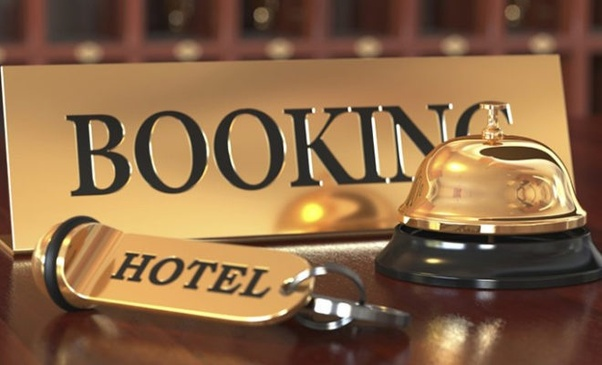

 Before starting our analysis the first question thats comes in my mind is,

 # <font color='skyblue'>  What is Exploratory Data Analysis?</font> 

Basically it is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.




Exploratory Data Analysis helps us to,



* To give insight into a data set.

* Understand the underlying structure.

* Extract important parameters and relationships that hold between them.

* Test underlying assumptions

This data set is ideal for anyone looking to practice their exploratory data analysis (EDA) or get started in building predictive models!

We can divide the Hotel Booking EDA into 2 sections:

* In the first part we deal with Data Collection, Data Exploration, Data Cleaning, etc.

* In the second part we extract information from our data and try to answer some really important questions that govern the bookings.

#Data collection:-


**Importing the required libraries for EDA:**

To start with, I have imported all the necessary libraries for this analysis i.e pandas, numpy, matplotlib.pyplot, seaborn & datetime.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from datetime import datetime as dt
from datetime import time 
from datetime import date

<font color='red'>WARNING!!</font> 


Warnings are good but some times unnecessary, so to avoid this i have imported the warnings library and **ignored** the future warnings.  :P

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

Mounting the Google Drive to Google Colab:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Loading the data into the data frame:**

Loading the data into the pandas data frame is certainly one of the most important steps in EDA.

Read the csv file using read_csv() function of pandas library where each data is separated by the delimiter “,” in given data set.

In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Data science/Alma Better/Python/Team Capstone project/Hotel Bookings.csv")

#Data Exploration:-


In [ ]:
hotel_df.shape

(119390, 32)

Data set contains 119390 Rows & 32 columns/features

In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


# <font color='green'>Pandas Profiling:-</font> 

## Long Live to Pandas profiling!!
A Perfect Overview of your Data.

* Generally, EDA starts by describe, info methods, which has to be done separately but Pandas Profiling extends the general data frame report using a single line of code which interactively describes the statistics, displays descriptive overview of the data sets.

* The main disadvantage of pandas profiling is its use with large datasets. With the increase in the size of the data the time to generate the report also increases a lot.
One way to solve this problem is to generate the report from only a part of all the data we have.

In [ ]:
# ! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 
# from pandas_profiling import ProfileReport

In [ ]:
# profile = ProfileReport(hotel_df, title = "Hotel booking analysis", html = {'style': {'full_width': True}}, sort="None")
# profile.to_notebook_iframe()

Pandas Profiling can also generate interactive reports in web format(html) that can be presented to any person, even if they don’t know programming.

In [ ]:
# profile.to_file(output_file="your_report.html")


# <font color='orange'>Data Cleaning :-</font> 
* Data cleaning can be a very tedious task. It’s the start of a new project and you’re excited to apply some machine learning models.  You take a look at the data and quickly realize it’s an absolute mess.

* According to IBM Data Analytics you can expect to spend up to 80% of your time cleaning data.


Data Cleaning includes Identifying and Handling Duplicate Data, Identifying and Handling Missing Data, Feature selection, Droping NaN values, Converting datatype & replacing values, Datetime operations, Dealing with Outliers, etc.

**Identifying and Handling Duplicate Data:**

It is necessary to determine whether the data you are using has duplicated rows. We are going to identify duplicate rows and handle it.

In [ ]:
duplicate_rows = hotel_df[hotel_df.duplicated()]
print(duplicate_rows.shape)

(31994, 32)


There are 31994 duplicate rows in the dataset. We are going to drop the  duplicate rows else it might cause problems in the analysis.

In [ ]:
hotel_df = hotel_df.drop_duplicates()
hotel_df.shape

(87396, 32)

After dropping the duplicate rows, we are left with 87396 rows.

**Identifying and Handling Missing Data:**

* In my opinion, handling missing values is an essential part of data cleaning and preparation process because almost all data in real life comes with some missing values.

* In DataFrame sometimes many datasets simply arrive with missing data, either because it exists and was not collected or it never existed. 

We will detect missing values and handle them in a proper and efficient way by first finding columns with missing values.



In [ ]:
# Finding features/columns with Nan values 
features_with_null_values = [feature for feature in hotel_df.columns if hotel_df[feature].isnull().sum()>1]
features_with_null_values

['children', 'country', 'agent', 'company']

There are 4 Columns  'children', 'country', 'agent', 'company' with missing values. Now we are going to calculate null percentage for each columns

In [ ]:
print(round(100*(hotel_df.isnull().sum()/len(hotel_df.index)),3))

hotel                              0.000
is_canceled                        0.000
lead_time                          0.000
arrival_date_year                  0.000
arrival_date_month                 0.000
arrival_date_week_number           0.000
arrival_date_day_of_month          0.000
stays_in_weekend_nights            0.000
stays_in_week_nights               0.000
adults                             0.000
children                           0.005
babies                             0.000
meal                               0.000
country                            0.517
market_segment                     0.000
distribution_channel               0.000
is_repeated_guest                  0.000
previous_cancellations             0.000
previous_bookings_not_canceled     0.000
reserved_room_type                 0.000
assigned_room_type                 0.000
booking_changes                    0.000
deposit_type                       0.000
agent                             13.951
company         

As we can see the company column has quite alot of NaN values, about 94% data is missing followed by agent column with about 14% data is missing.


**Feature selection and Feature Engineering:**

let’s do the Feature selection and feature engineering. We will create more relevant features and remove irrelevant or less important features. 


* Feature selection is one of the first and important steps while performing any machine learning task. Not necessarily every column (feature) is going to have an impact on the analysis. 


<font color='pink'> Garbage In Garbage Out!! </font> 

Dropping "company" column because more than 90% of data is missing & Dropping "arrival_dat_week_number", "agent",  "reservation_status_date", "previous_cancellations", "previous_bookings_not_canceled" as it is unnecessary for this data analysis.

In [ ]:
hotel_df.drop(columns= ["agent", "company","arrival_date_week_number", "previous_cancellations","booking_changes"], inplace= True)
hotel_df.shape

(87396, 27)

**Droping NaN values:**


Dropping 456 NaN rows from the dataset, as this null rows only account for about 0.5% of the total rows.

In [ ]:
# Droping NaN values 
hotel_df = hotel_df.dropna()
hotel_df.shape

(86940, 27)



**Converting datatype & replacing values:**

Converting Datatype for Children column from float type to integer type because we can't have number of childrens in float.



In [ ]:
hotel_df["children"] = hotel_df["children"].astype('int64')

Replacing value 1 with "Yes" and 0 with "No" for "is_canceled"& "is_repeated_guest" columns because its more intuitive and easy to interpret.

In [ ]:
hotel_df["is_canceled"].replace([1,0],["Yes","No"], inplace =  True)
hotel_df["is_repeated_guest"].replace([1,0],["Yes","No"], inplace =  True)

**Datetime operations :**

dt.strptime (string parser)  will convert a string format to datetime format.

In [ ]:
hotel_df["reservation_status_date"] = hotel_df["reservation_status_date"].apply(lambda x: dt.strptime(x, "%Y-%m-%d"))

**Dealing with Outliers:**

There are certain things which, if are not done in the EDA phase, can affect further statistical/Machine Learning modelling. One of them is finding “Outliers”.

Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.



In [ ]:
q1= hotel_df.quantile(0.25)
q3= hotel_df.quantile(0.75)
IQR = q3-q1
print(f"Number of values in IQR for Features are :  \n {IQR}")

Number of values in IQR for Features are :  
 lead_time                         113.00
arrival_date_year                   1.00
arrival_date_day_of_month          15.00
stays_in_weekend_nights             2.00
stays_in_week_nights                3.00
adults                              0.00
children                            0.00
babies                              0.00
previous_bookings_not_canceled      0.00
days_in_waiting_list                0.00
adr                                61.85
required_car_parking_spaces         0.00
total_of_special_requests           1.00
dtype: float64


We start by defining a function, so that we deal with the outliers column/feature wise.The end result is the list of all those data items that satisfy the outlier definition according to the method used and removing the values that are beyond the defined range. The good thing about writing function is that we can reuse the code again and again.

In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1                                               #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

Now Creating new different types dataframes for confirm bookings, canceled bookings, Resort Hotels & City Hotels, which would be used later in our analysis.

In [ ]:
not_canceled_df = hotel_df[hotel_df["is_canceled"]=="No"]
canceled_df =  hotel_df[hotel_df["is_canceled"]=="Yes"]
resort_hotel_df = not_canceled_df[not_canceled_df['hotel']=='Resort Hotel']
city_hotel_df = not_canceled_df[not_canceled_df['hotel']=='City Hotel']

#Now let’s do the fun part!!
We will extract information from our data set and try to answer the following questions.

1. Types of hotel booking done by a customer & booking ratio between the different types?

2. Years & Months with highest & lowest waiting list days?

3. Busiest month of the hotel & Number of Special requests for different months?

4. Is there any relation between Repeated guest & number of Special requests?

5. From which country most visitors come from?

6. Cancelation rate for hotels

7. Reservation status for the Confirmed & Canceled bookings

8. How many nights are the visitors prefer to stay in the hotel?

9. Which was the most booked accommodation type (Single, Couple, Family)?

10. ADR(Average Daily Rate) for Market segments & for Top 10 Countries

11. Relation between Lead Time & Cancelation Rate?

12. Customer Type for hotels

13. Market Segments for hotels

14. Bi-Variate Analysis!!

15. What are the Reserved room type & Assigned room type bookings, also ADR for Reserved room type & Assigned room type

16. Types of meal booked by the customers?

17. Deposit Type for Market Segment




#1. Types of hotel booking done by the customers & booking ratio between the different types of hotel.

To answer this question, we will start by plotting a histogram for the hotel column in our dataset.

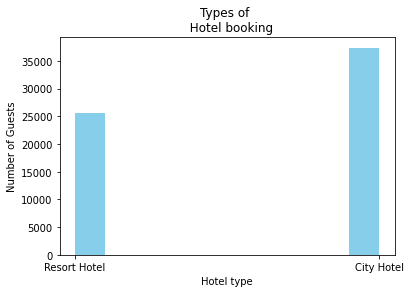

In [ ]:
# Plotting types of hotel bookings
plt.figure(figsize=(6,4))
plt.hist(not_canceled_df.hotel, color="skyblue")
plt.xlabel("Hotel type")
plt.ylabel("Number of Guests")
plt.title("Types of \n  Hotel booking");

This data set contains various booking information between two hotels i.e City hotel and a Resort hotel. Now lets find the actual count for the hotels of the confirmed bookings only.

In [ ]:
not_canceled_df.groupby("hotel")["is_canceled"].count().rename_axis('Hotels').reset_index(name='Number of Visitors ')

,Hotels,Number of Visitors
0,City Hotel,37377
1,Resort Hotel,25576


**Conclusion :** There are 2 types of booking Resort Hotel & City Hotel. The Number of Guests for Resort Hotels is around 37000 & for City Hotels is around 25000. 

Now lets find booking ratio between the different types of hotel using a pie plot.

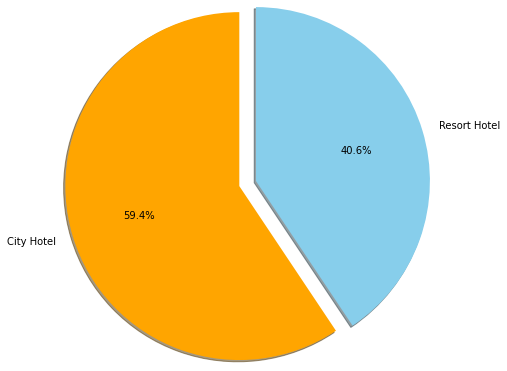

In [ ]:
list1 = not_canceled_df["hotel"].value_counts().tolist()

# As the name suggest, explode will determine how much each section is seperated from each other
exp = [0,0.2]

# Determine the color of the piechart
cl = ['orange','skyblue']

plt.pie(list1, labels=["City Hotel","Resort Hotel"], autopct='%1.1f%%', radius = 2,  explode=exp, colors=cl, shadow=True, startangle=90);

**Conclusion :**
Around 60% booking is done in City Hotels as compared to Resort Hotels. This could be because city hotels tend to be cheaper, everything is more accessible and more suitable for individuals or small groups of visitors. As Resort hotels tend to have less bookings in comparison to city hotels so they need to work on their marketing strategy and promote the hotels more, especially on social media.
Resort hotels could also reduce prices to increases booking percentages.

#2. Years & Months with highest & lowest average waiting list days for the types of hotel.

 The column "days_in_waiting_list" in our data set implies, number of days the booking was in the waiting list before it was confirmed to the customer.

 To find the months with highest & lowest average waiting list days, lets use the two Dataframes "city_hotel_df" & "resort_hotel_df" that we have created in the beginning.


In [ ]:
city_hotel_waiting_df = city_hotel_df.groupby("arrival_date_month")["days_in_waiting_list"].mean().rename_axis('Months').reset_index(name='City Hotel Avg waiting days ')
city_hotel_waiting_df.set_index("Months", inplace= True)

In [ ]:
resort_hotel_waiting_df = resort_hotel_df.groupby("arrival_date_month")["days_in_waiting_list"].mean().rename_axis('Months').reset_index(name='Resort Hotel Avg waiting days')
resort_hotel_waiting_df.set_index("Months", inplace= True)

In [ ]:
merged_df = pd.merge(resort_hotel_waiting_df, city_hotel_waiting_df, how= "inner", on="Months")

Let’s plot the heatmap and see the correlation for the highest & lowest average waiting list days across the different months.



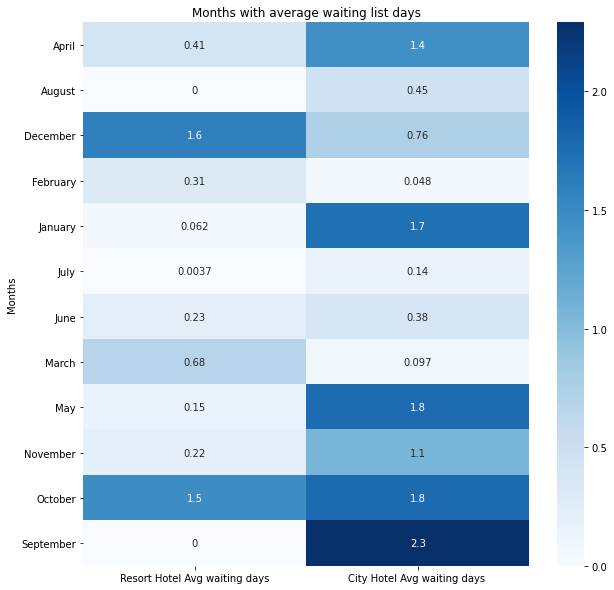

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Months with average waiting list days")
sns.heatmap(merged_df, annot= True, cmap="Blues");

Lets have a more clear picture by plotting a bar for theWaiting days for Arrival Months.

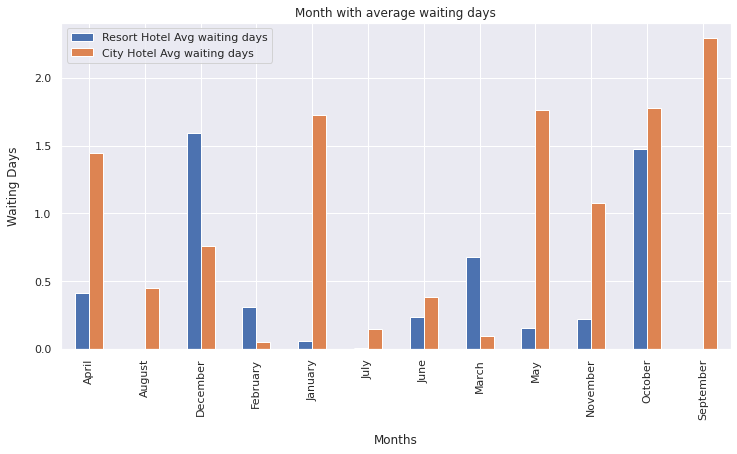

In [ ]:
sns.set(font_scale=1)
ax = merged_df.plot(kind="bar", title="Month with average waiting days", figsize=(12,6))
plt.xlabel("Months", labelpad=14)
plt.ylabel("Waiting Days", labelpad=14);

**Conclusion :** As City Hotels have 20% more bookings than Resort Hotels therefore average waiting list days is more for City Hotels than Resort Hotels. For City Hotels the highest average waiting days is in September & the lowest waiting days is in February. For Resort Hotels the highest average waiting days is in December. Surprisingly August & September has 0 waiting days. Also July has average waiting days close to zero.

Lets Plot a bar plot for average the waiting list days for all the years in our data set with a certain confidence interval.

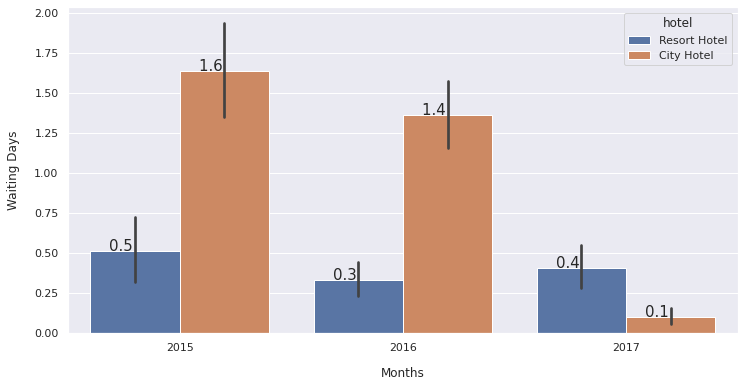

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot("arrival_date_year", "days_in_waiting_list", data = not_canceled_df, hue= "hotel")
plt.xlabel("Months", labelpad=14)
plt.ylabel("Waiting Days", labelpad=14);
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"    {round(p.get_height(),1)}", fontsize=15)

**Conclusion:**
Year 2015 had the highest waiting list days & year 2017 had the lowest waiting list days for City Hotels. For the Resort Hotels the average waiting days for the all the years is almost same, 2015 being the highest & 2016 being the lowest waiting days.

#3. Which is the busiest month for the hotels & Number of special requests for different months.

To answer this question, we will select the "arrival_date_month" feature i.e Month of arrival date and get its value count. Before that lets check if the data is uniform or not for the months across different years.



In [ ]:
temp = pd.DataFrame(index=not_canceled_df.groupby(not_canceled_df['arrival_date_year']).sum().index)
for i in not_canceled_df['arrival_date_month'].unique():
  temp[i] = not_canceled_df[not_canceled_df['arrival_date_month']==i]['arrival_date_year'].value_counts()
  
temp = temp [['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
temp

,January,February,March,April,May,June,July,August,September,October,November,December
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,1149,1870,2259.0,2239.0,1402.0,1590.0
2016,1515.0,2246.0,2911.0,2734.0,2827.0,2595.0,2747,2973,2764.0,3007.0,2499.0,2119.0
2017,2086.0,2383.0,2719.0,2733.0,3074.0,2805.0,2936,2771,NaN,NaN,NaN,NaN


Lets plot a bar plot for better visualization.

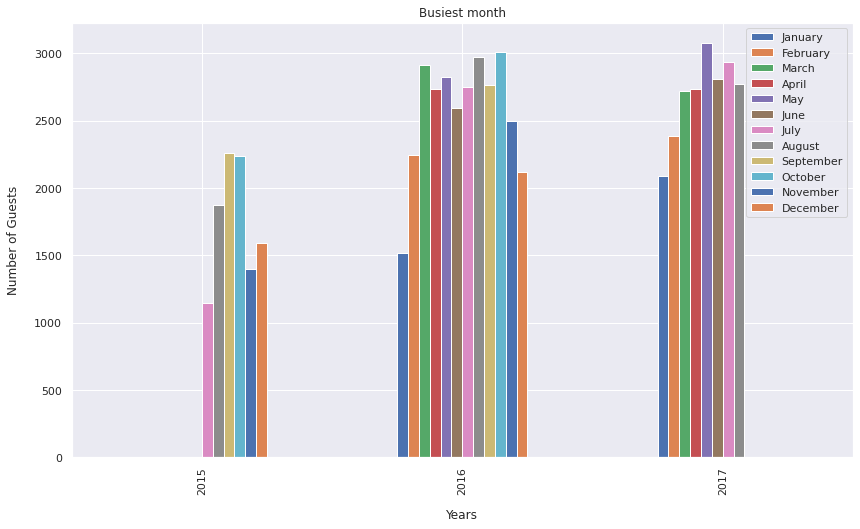

In [ ]:
ax = temp.plot(kind="bar", title="Busiest month", figsize=(14,8))
plt.xlabel("Years", labelpad=14)
plt.ylabel("Number of Guests", labelpad=14);

We can clearly see that the data present is non-uniform for months across different years in our data set.

Note:
The calendar year can be divided into four quarters, often abbreviated as Q1, Q2, Q3, and Q4.

We only have the following quarters for a year,

2015 - Q3 & Q4

2016 - Q1 to Q4

2017 - Q1 to Q3 (Excluding the month of September in Q3)

As the data set in non uniform, we can tackle this problem by taking the mean count of the months across the years.


In [ ]:
mean_month_df = temp.mean(axis=0).rename_axis('Months').reset_index(name='Values')
mean_month_df.set_index("Months", inplace= True)
mean_month_df

,Values
Months,
January,1800.500000
February,2314.500000
March,2815.000000
April,2733.500000
May,2950.500000
June,2700.000000
July,2277.333333
August,2538.000000
September,2511.500000


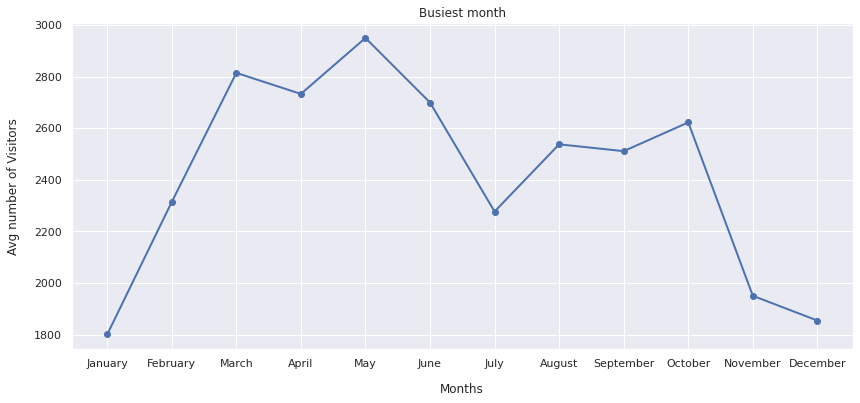

In [ ]:
plt.figure(figsize=(14,6))
ax = plt.plot(mean_month_df.index, mean_month_df.Values, "b-o", linewidth = 2, markersize = 6)
plt.title("Busiest month")
plt.xlabel("Months", labelpad=14)
plt.ylabel("Avg number of Visitors", labelpad=14);

**Conclusion:**
For Hotels the busiest month is May & the least busiest month is January. We can see that there are some seasonality during the years, which is normal in hospitality, which get more bookings in the Spring. This could be because of weather conditions as people prefer going for vacation during more comfortable seasons such as Spring/Summer and not during Winters.

# Number of special requests for different months?

To answer this question we use the column "total_of_special_requests" in our data set, that implies number of special requests (e.g. twin bed or high floor) made by the customer to make their stay more comfortable.

In [ ]:
special_req_df = pd.pivot_table(
  not_canceled_df,
	values="total_of_special_requests",
	index="arrival_date_year",
	columns="arrival_date_month",
	aggfunc= "sum"
)
special_req_df = special_req_df [['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']]
special_req_df

arrival_date_month,January,February,March,April,May,June,July,August,September,October,November,December
arrival_date_year,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,786.0,1601.0,1398.0,1405.0,660.0,920.0
2016,771.0,1292.0,1554.0,1724.0,1811.0,1932.0,2362.0,2605.0,2391.0,2378.0,2115.0,1861.0
2017,1568.0,1836.0,1953.0,2316.0,2598.0,2275.0,2781.0,3077.0,NaN,NaN,NaN,NaN


We will be taking the mean values due to the nonuniformity in the dataset across different years.

In [ ]:
mean_special_req = special_req_df.mean(axis=0).rename_axis('Months').reset_index(name='Speical_requests')
mean_special_req.set_index("Months", inplace= True)
mean_special_req

,Speical_requests
Months,
January,1169.500000
February,1564.000000
March,1753.500000
April,2020.000000
May,2204.500000
June,2103.500000
July,1976.333333
August,2427.666667
September,1894.500000


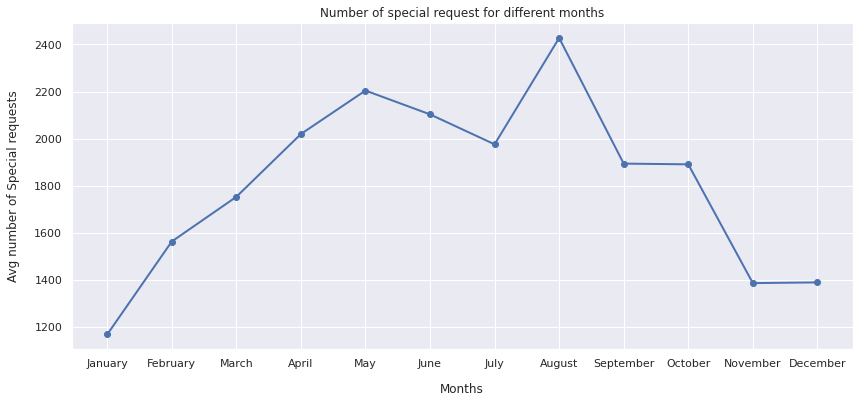

In [ ]:
plt.figure(figsize=(14,6))
ax = plt.plot(mean_special_req.index, mean_special_req.Speical_requests, "b-o", linewidth = 2, markersize = 6) 
plt.title("Number of special request for different months")
plt.xlabel("Months", labelpad=14)
plt.ylabel("Avg number of Special requests", labelpad=14);

**Conclusion:**  August has the highest number of special requests followed by May. We can expect this trend as the busiest months are in summers. Also the least busiest month is January followed by December therefore having lowest number of special requests.

#4. Is there any relation between Repeated guest & Number of special requests :

It's a common conception that a repeated guest is likely to have a special request because of the familarity with the hotel.

The column "is_repeated_guest" in our data set that implies, if the booking name was from a repeated guest or not.


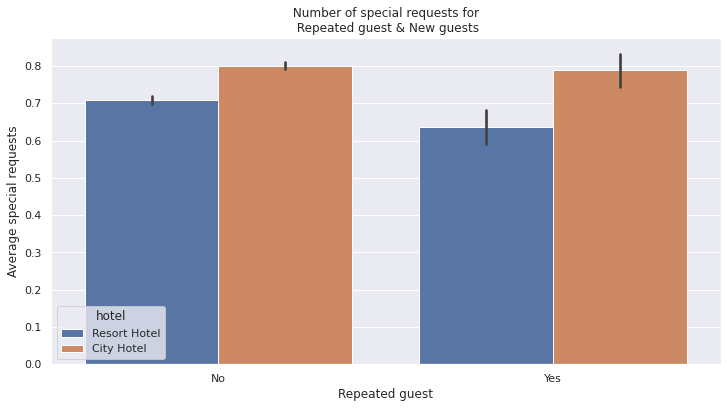

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot("is_repeated_guest","total_of_special_requests", data = not_canceled_df, hue = "hotel")
plt.title(" Number of special requests for \n Repeated guest & New guests")
ax.set(xlabel="Repeated guest", ylabel = "Average special requests");

**Conclusion:** As Both Repeated guest & New guests have approximately same average number special requests, so we can safely say that fairly no relation between Repeated guest & Number of special requests in the data set as contrary to the popular belief that a repeated guest is likely to have a special request.

#5. From which country most visitors come from?

To see the country wise comparison plot the country column. In the country column, we have codes for each country like PRT for Portugal , GBR for United Kingdom and so on. Categories are represented in the ISO 3155–3:2013 format.

In [ ]:
country_df = not_canceled_df["country"].value_counts().reset_index()
country_df.rename(columns={"index":"country", "country":"count"}, inplace=True)
country_df.set_index("country", inplace=True)

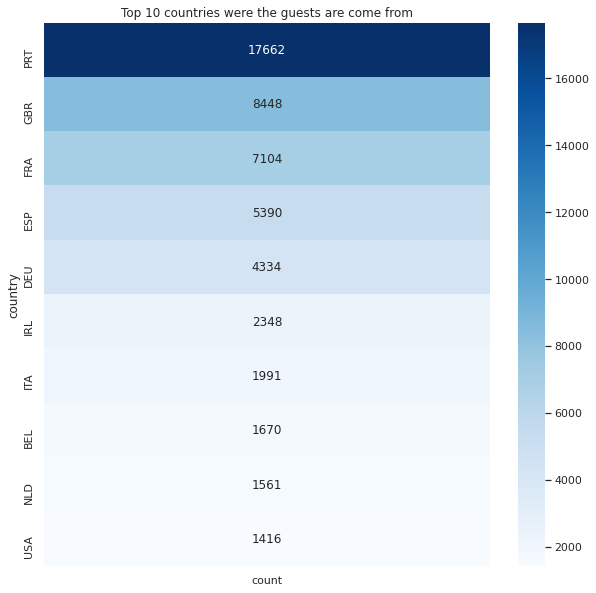

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Top 10 countries were the guests are come from")
sns.heatmap(country_df[:10], annot= True, fmt="d", cmap="Blues");

**Conclusion :** From the plot of  the top 10 countries were the guests come from, we can see that more visitors are from western europe, namely France, UK and Portugal being the highest among them.

#6. Month wise cancelation & bookings for different types of hotel

The column "is_canceled" in our data set that implies, if the booking was canceled ("Yes") or not ("No").

Lets find out the cancelation for hotel types.

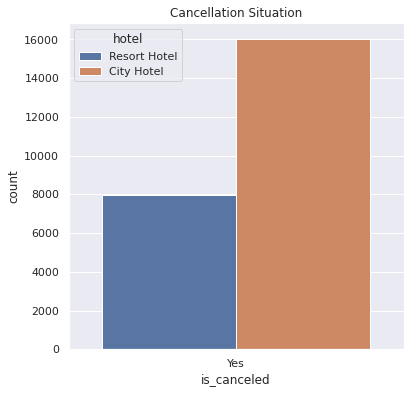

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='is_canceled', hue = 'hotel', data= canceled_df)
plt.title('Cancellation Situation');

**Conclusion:**
City hotels tend to have more cancellations almost double as compared to the resort hotels.

Lets find out month wise cancelations & bookings for different types of hotel.

In [ ]:
temp1 = pd.DataFrame(index=hotel_df.groupby('arrival_date_month').mean().index)
temp1['Resort Hotel Canceled'] = hotel_df[(hotel_df['hotel']=='Resort Hotel')&(hotel_df['is_canceled']== "Yes")]['arrival_date_month'].value_counts()
temp1['Resort Hotel Booked'] = hotel_df[(hotel_df['hotel']=='Resort Hotel')&(hotel_df['is_canceled']=="No")]['arrival_date_month'].value_counts()

In [ ]:
temp2 = pd.DataFrame(index=hotel_df.groupby('arrival_date_month').mean().index)
temp2['City Hotel Canceled'] = hotel_df[(hotel_df['hotel']=='City Hotel')&(hotel_df['is_canceled']=="Yes")]['arrival_date_month'].value_counts()
temp2['City Hotel Booked'] = hotel_df[(hotel_df['hotel']=='City Hotel')&(hotel_df['is_canceled']=="No")]['arrival_date_month'].value_counts()

In [ ]:
merged_df = pd.merge(temp1, temp2, how= "inner", on="arrival_date_month") 
merged_df   

,Resort Hotel Canceled,Resort Hotel Booked,City Hotel Canceled,City Hotel Booked
arrival_date_month,,,,
April,655,2137,1749,3330
August,1512,3133,2106,4481
December,394,1675,979,2034
February,439,1999,975,2630
January,273,1635,764,1966
July,1294,2986,1898,3846
June,832,1916,1521,3484
March,464,2139,1365,3491
May,696,2234,1746,3667


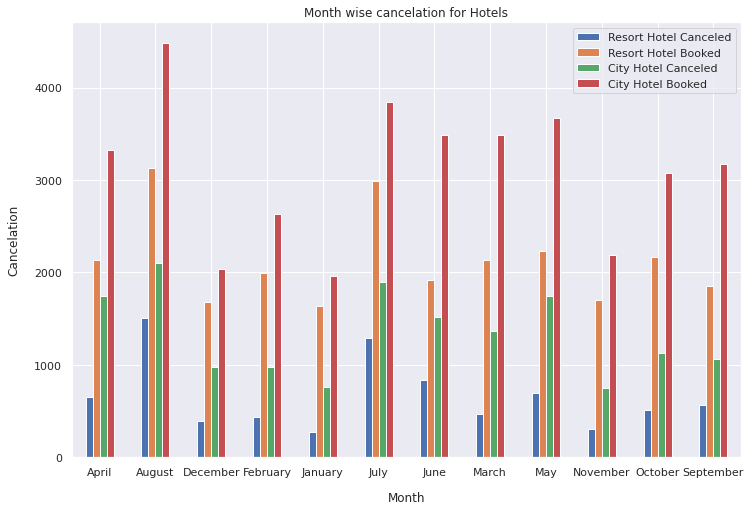

In [ ]:
sns.set(font_scale=1)
merged_df.plot(kind="bar", title="Month wise cancelation for Hotels", figsize=( 12,8), rot=0)
plt.xlabel("Month", labelpad=14)
plt.ylabel("Cancelation", labelpad=14);

**Conclusion:** Although city hotels have more bookings, they also tend to have more cancellations so to prevent this they could take advance money during vacation. This would ensure most bookings to not being cancelled. They could also apply no-refund policies or make the refund policies rather strict so the customers choose not to cancel.

#7.  Reservation status for the Canceled & Confirmed Bookings?

Reservation last status, assuming one of three categories: 

* Canceled – Booking was canceled by the customer.
* Check-Out – Customer has checked in but already departed.
* No-Show – Customer did not check-in and did inform the hotel of the reason why.

In [ ]:
temp = pd.DataFrame(index=hotel_df.groupby("is_canceled").sum().index)
for i in hotel_df['reservation_status'].unique():
  temp[i] =hotel_df[hotel_df['reservation_status']==i]["is_canceled"].value_counts()
temp = temp.fillna(0)
temp

,Check-Out,Canceled,No-Show
is_canceled,,,
No,62953.0,0.0,0.0
Yes,0.0,22977.0,1010.0


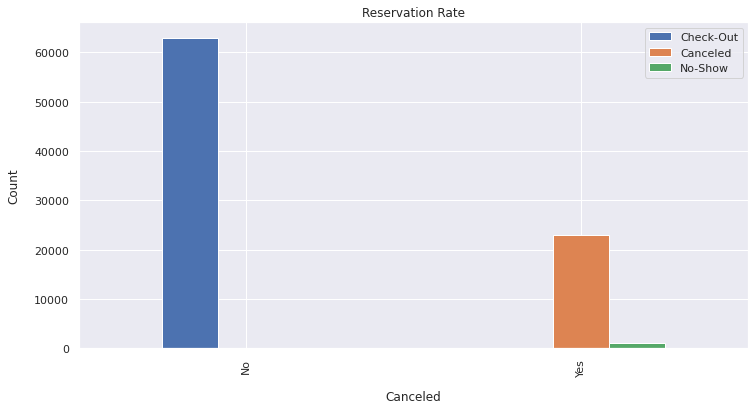

In [ ]:
temp.plot(kind="bar", title="Reservation Rate", figsize=(12,6))
plt.xlabel("Canceled", labelpad=14)
plt.ylabel("Count", labelpad=14);

Conclusion: Around 63000 confirmed bookings has Check-Out, 23000 is Canceled & around 1000 did not check-in but informed the hotel of the reason.

#8. How many nights does visitors prefer to stay in the hotel?

Lets create a new columns with the total number of nights stayed at the hotel, i.e Number of weekend nights (Saturday or Sunday) + Number of week nights (Monday to Friday) the guest booked to stay at the hotel.

In [ ]:
not_canceled_df["total_nights"] = not_canceled_df['stays_in_weekend_nights'] + not_canceled_df['stays_in_week_nights']

In [ ]:
staying_nights = not_canceled_df["total_nights"].value_counts().reset_index()
staying_nights.rename(columns={"index":"total_nights", "total_nights":"count"}, inplace=True)
staying_nights["% of guest"]= (staying_nights["count"]*100)/staying_nights["count"].sum()
staying_nights = staying_nights.sort_values(by = "total_nights", ascending=True,  ignore_index=True)
staying_nights.head()

,total_nights,count,% of guest
0,0,617,0.980096
1,1,13814,21.943355
2,2,11435,18.164345
3,3,12456,19.786190


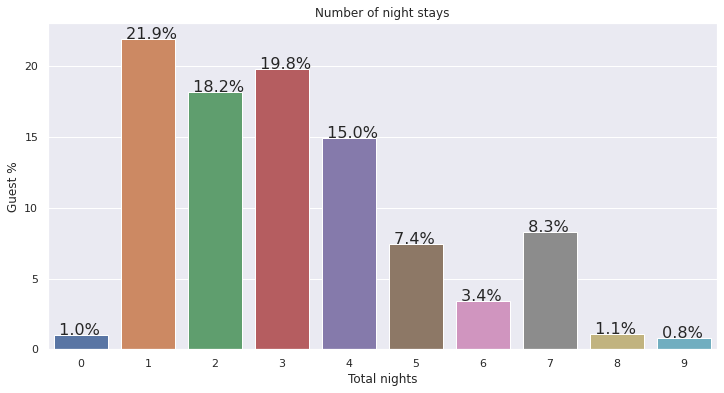

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot("total_nights", "% of guest", data = staying_nights[0:10] )
ax.set(xlabel="Total nights", ylabel = "Guest %")
ax.set_title("Number of night stays");
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f" {round(p.get_height(),1)}%", fontsize=16)

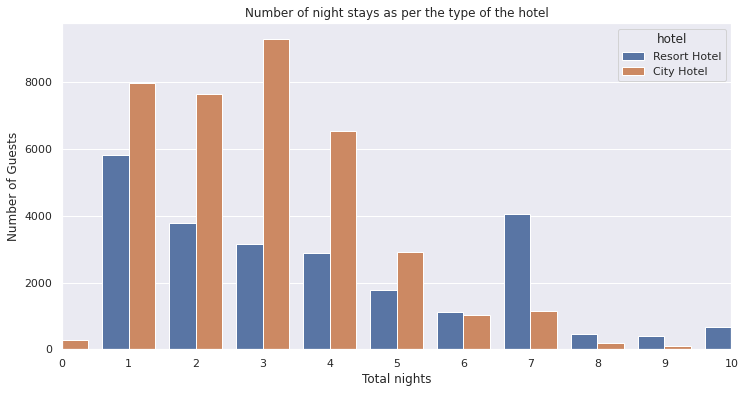

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.countplot(x="total_nights", hue = "hotel", data = not_canceled_df)
ax.set(xlabel="Total nights", ylabel = "Number of Guests")
ax.set(xlim=(0, 10))
ax.set_title("Number of night stays as per the \n type of the hotel");

**Conclusion:**
Most people stay upto 4 nights. More than 70% of guests come under these category


#9. Which was the most booked accommodation type (Single, Couple, Family)?

We will divide people staying in the hotel into 3 categories.

* Single: 1 Adult only

* Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but surely with no children or babies.

* Family / Friends or group: More than 2 people including adults, children, and babies.

In [ ]:
single   = not_canceled_df[(not_canceled_df.adults==1) & (not_canceled_df.children==0) & (not_canceled_df.babies==0)]
couple   = not_canceled_df[(not_canceled_df.adults==2) & (not_canceled_df.children==0) & (not_canceled_df.babies==0)]
family   = not_canceled_df[((not_canceled_df.adults + not_canceled_df.children + not_canceled_df.babies) > 2) ]

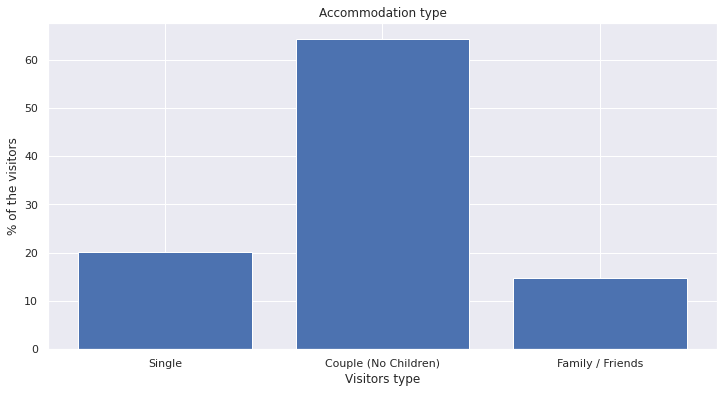

In [ ]:
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/not_canceled_df.shape[0]*100 for x in count]

plt.subplots(figsize=(12,6))
plt.bar(names, count_percent)
plt.xlabel("Visitors type")
plt.ylabel("% of the visitors")
plt.title("Accommodation type");

**Conclusion:** Couple (or 2 adults) is the most popular accommodation type with about 65%. For both hotels, it is common for poeple to not bring children or babies along but if they do, at most 1-2 children or 1 baby. The hotels could advertise in ways that attract couples more and also business travellers.


#10. ADR(Average Daily Rate): 
ADR is the only variable related to price in this dataset.

ADR Formula: ADR = Room Revenue / Rooms Sold

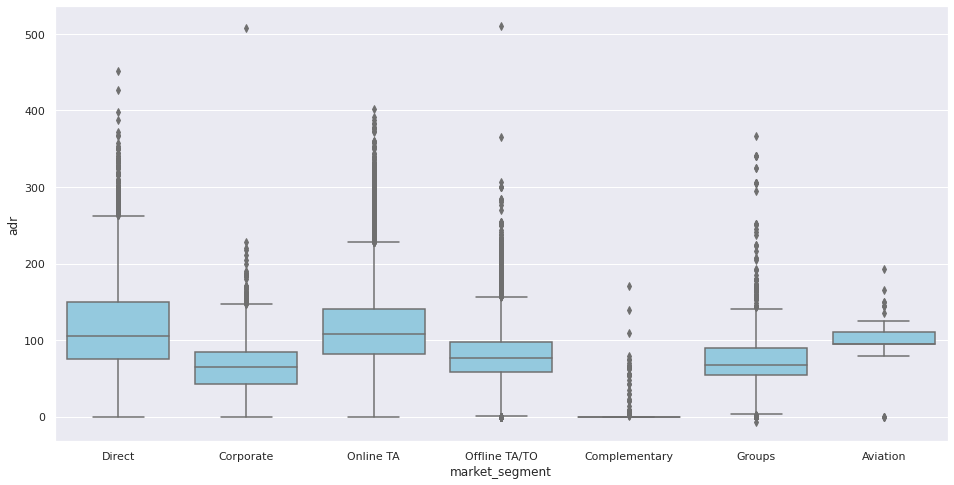

In [ ]:
df2 = not_canceled_df[not_canceled_df["adr"]<=1000]
fig, ax1= plt.subplots(figsize=(16,8))
ax1 = sns.boxplot(df2.market_segment, df2.adr, color = 'skyblue');

**Conclusion:** Aviation has the lowest variation of prices which is usually because these segments have contracts with flat prices and are not yieldable like other segments.

In [ ]:
#Removing outliers 
df3 = remove_outlier(not_canceled_df, "adr")

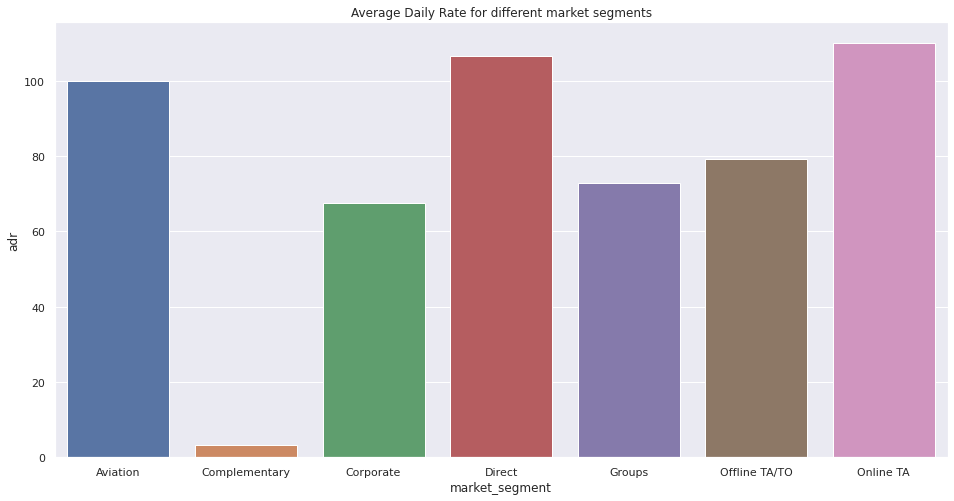

In [ ]:
grp1 = df3.groupby("market_segment").mean().reset_index()
fig, plot = plt.subplots(figsize=(16,8))
plot = sns.barplot("market_segment","adr", data = grp1)
plot.set_title("Average Daily Rate for different market segments");

**Conclusion:**  Direct and Online TA are the market segments with highest prices and higher variation, showing well how yield revenue management is a good thing.

In [ ]:
temp = not_canceled_df.groupby('country').mean()['adr'].to_frame().sort_values('adr',ascending=False)

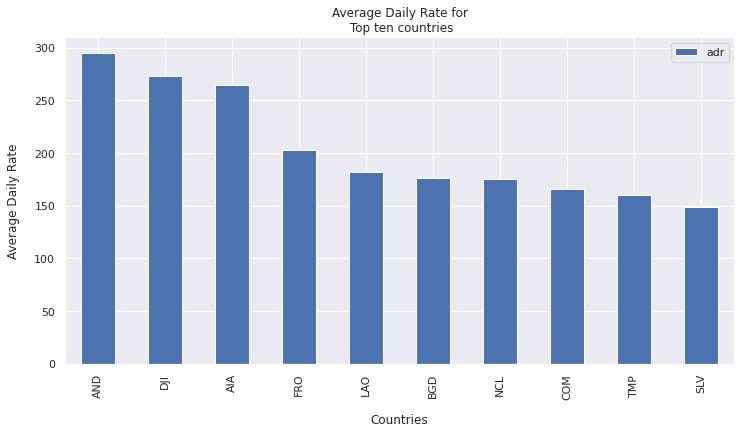

In [ ]:
temp[:10].plot(kind="bar", title="Average Daily Rate for\n Top ten countries", figsize=(12,6))
plt.xlabel("Countries", labelpad=14)
plt.ylabel("Average Daily Rate", labelpad=14);

**Conclusion:** Country Andorra has the highest adr, followed by Djibouti country.

#11. Relation between Lead Time & Cancelation Rate:

Lead time column in the data set implies that the number of days that elapsed between the entering date of the booking into the PMS and the arrival date.

Lets check cancelation density for different ranges of the lead time.

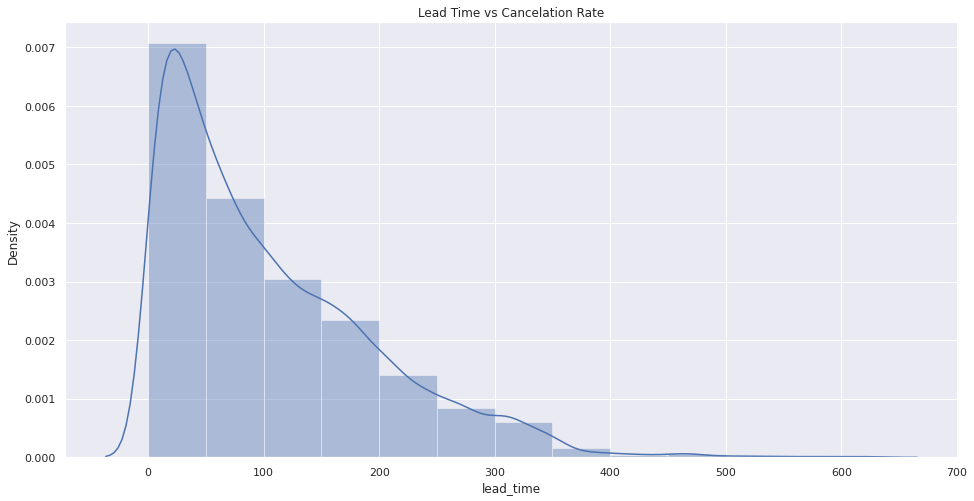

In [ ]:
fig, plot = plt.subplots(figsize=(16,8))
plt.title("Lead Time vs Cancelation Rate")
ax = sns.distplot(canceled_df.lead_time, bins= np.arange(0, 600,50) );                                 

**Conclusion:**  It is clear that highest cancelation rate belongs in the first 50 days of the lead time.

Further lets find relation between Lead Time & Cancelation Ratio.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


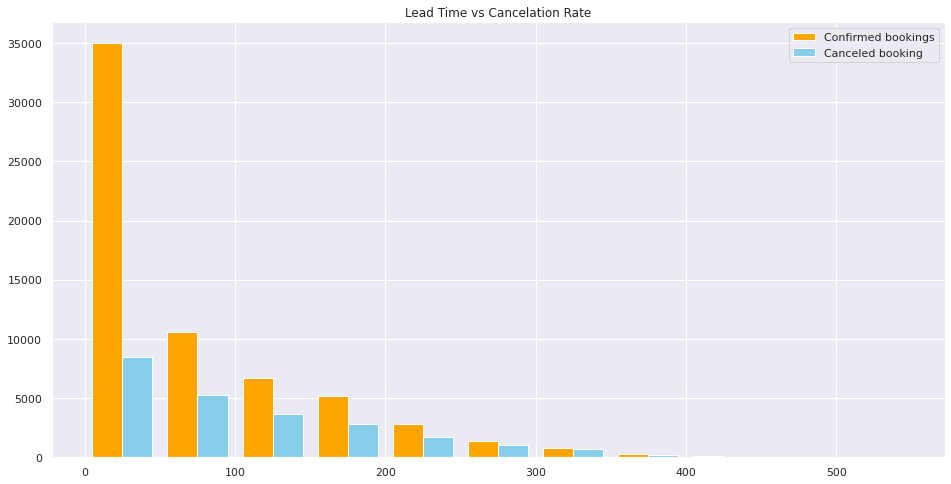

In [ ]:
fig, plot = plt.subplots(figsize=(16,8))
plt.title("Lead Time vs Cancelation Rate")
plt.hist([not_canceled_df.lead_time, canceled_df.lead_time], color = ["orange","skyblue"], bins= np.arange(0, 600,50));
plt.legend(["Confirmed bookings", "Canceled booking"]);

**Conclusion:**   It clear though the density of  the cancelation decreases as the lead time increases still the cancelation rate increases as the lead time increases.

#12. Customer Type:

Customer type column in the data set implies that the type of booking, assuming one of four categories:

 Contract - when the booking has an allotment or other type of contract associated to it;

  Group – when the booking is associated to a group; 

  Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; 

  Transient-party – when the booking is transient, but is associated to at least other transient booking

  Lets count the number of confirmed bookings for the customer types.

In [ ]:
temp = pd.DataFrame(index=not_canceled_df.groupby('customer_type').sum().index)

for hotel in not_canceled_df['hotel'].unique():
  temp[hotel] = not_canceled_df[not_canceled_df['hotel']==hotel]['customer_type'].value_counts()
    
temp = temp.sort_values('City Hotel',ascending=False)

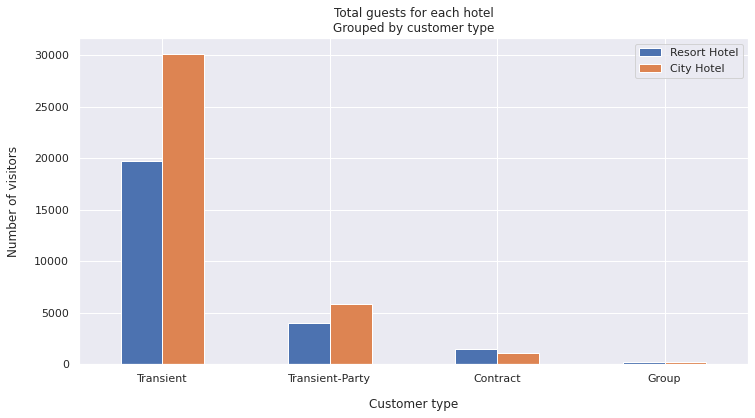

In [ ]:
sns.set(font_scale=1)
temp.plot(kind="bar", title="Total guests for each hotel\nGrouped by customer type", figsize=( 12,6), rot=0)
plt.xlabel("Customer type", labelpad=14)
plt.ylabel("Number of visitors", labelpad=14);

**Conclusion:**   Clearly Transient customers are more popular in hotel bookings i.e  guests who are predominantly on-the-move and seek short (and often urgent!) hotel-stays. Such guests are usually not looking for anything more than a basic service: a clean and comfortable room for the night, and a nice breakfast in the morning. 

#13. Market Segment for hotels

Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

In [ ]:
temp = pd.DataFrame(index=not_canceled_df.groupby(not_canceled_df['market_segment']).sum().index)

for hotel in not_canceled_df['hotel'].unique():
    temp[hotel] = not_canceled_df[not_canceled_df['hotel']==hotel]['market_segment'].value_counts()

temp = temp.sort_values('City Hotel',ascending=False)

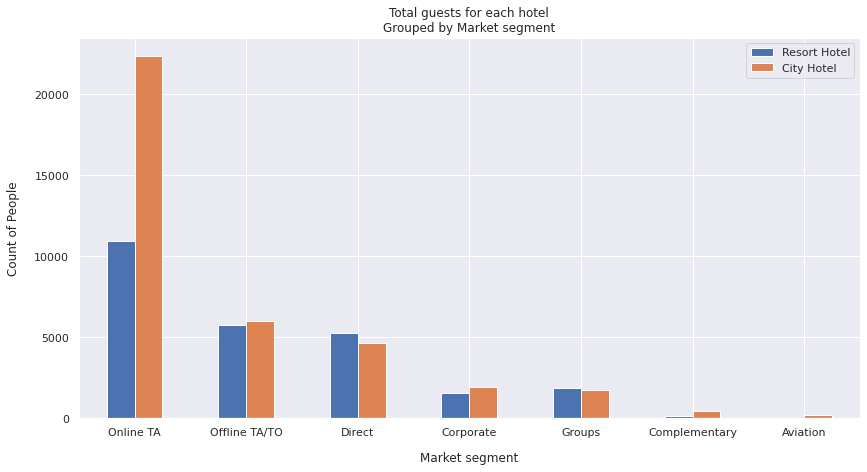

In [ ]:
sns.set(font_scale=1)
temp.plot(kind="bar", title="Total guests for each hotel\nGrouped by Market segment", figsize=( 14,7), rot=0)
plt.xlabel("Market segment", labelpad=14)
plt.ylabel("Count of People", labelpad=14);

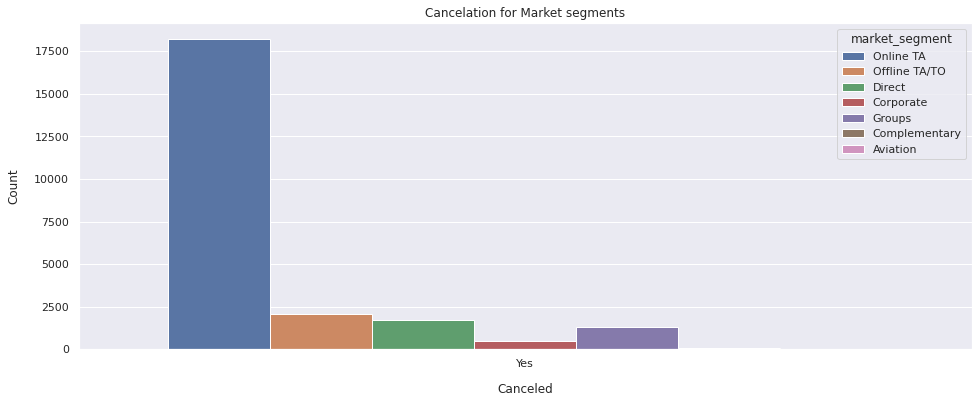

In [ ]:
plt.figure(figsize=(16,6))
ax = sns.countplot(data= canceled_df ,x="is_canceled",hue='market_segment')
plt.title('Cancelation for Market segments')
plt.xlabel("Canceled", labelpad=14)
plt.ylabel("Count", labelpad=14);

**Conclusion:**  Maximum cancelation are for Online travel agent & lowest cancelation are for Aviation

#14. Bi-Variate Analysis:

One of the best way to find the relationship between the features can be done using heat maps. Let’s plot the heatmap and see the correlation with the help of seaborn!!

*   Positive correlation is represented by dark shades 
*   Negative correlation is represented by lighter shades.

Light & dark shades same as those fair and lovely ads -_-



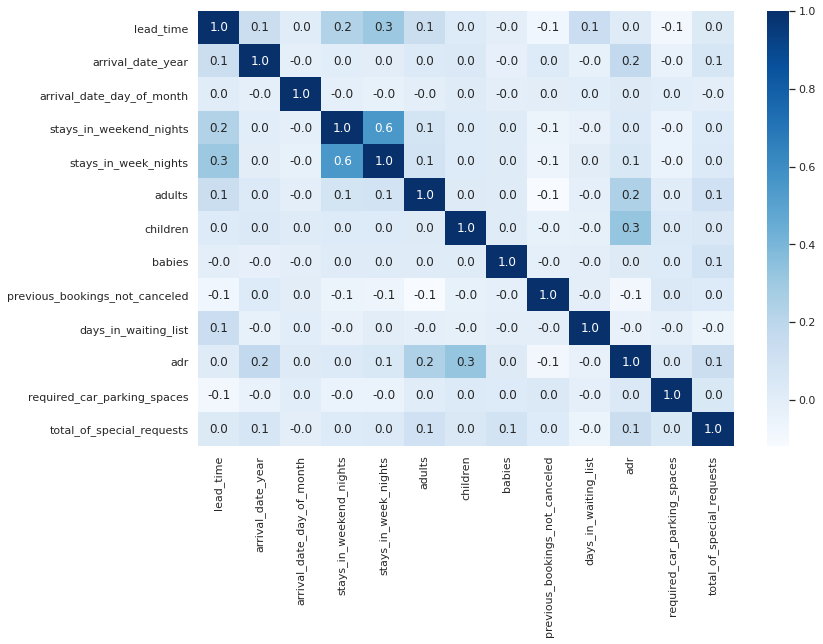

In [ ]:
fig, axes = plt.subplots(figsize=(12,8))
sns.heatmap(hotel_df.corr(), cmap="Blues", fmt=".1f",annot= True);

#15. What are the Reserved room type & Assigned room type bookings. ADR for Reserved room type & Assigned room type.

Code is presented instead of designation for anonymity reasons.


Some of the Room types are Single room, Double room, Triple room, Queen, King, Deluxe Room, Quad room.

Code for the type of room reserved for the booking.

In [ ]:
reserved_room = not_canceled_df['reserved_room_type'].value_counts(normalize=True).rename_axis('reserved_room_type').reset_index(name='Booking % for Reserved room type')
reserved_room["Booking % for Reserved room type"] = reserved_room["Booking % for Reserved room type"]*100
reserved_room

,reserved_room_type,Booking % for Reserved room type
0,A,65.961908
1,D,19.276285
2,E,6.938510
3,F,3.121376
4,G,2.071387
5,B,1.081759
6,C,0.981685
7,H,0.560736
8,L,0.006354


Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. 

Code for the type of room assigned to the booking.

In [ ]:
assigned_room = not_canceled_df['assigned_room_type'].value_counts(normalize=True).rename_axis('assigned_room_type').reset_index(name='Booking % for Assigned room type')
assigned_room["Booking % for Assigned room type"] = assigned_room["Booking % for Assigned room type"]*100
assigned_room

,assigned_room_type,Booking % for Assigned room type
0,A,50.807745
1,D,26.767589
2,E,8.635013
3,F,4.312741
4,C,2.781440
5,G,2.749670
6,B,2.257240
7,H,0.719584
8,I,0.549616
9,K,0.419360


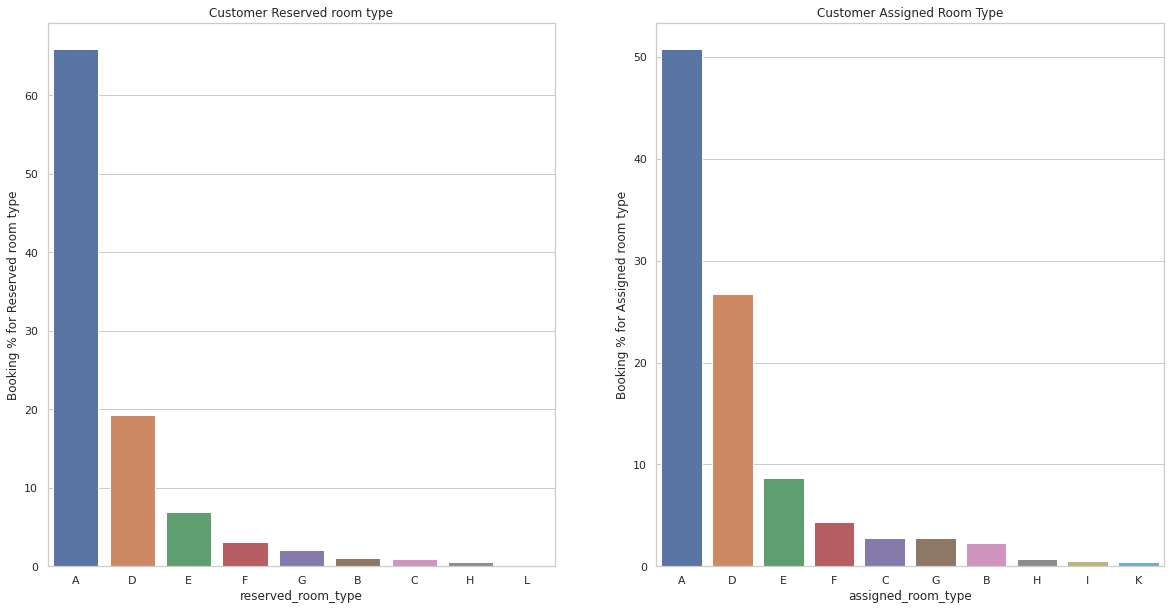

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10)) 

plt.subplot(1, 2, 1)
sns.barplot(x='reserved_room_type', y='Booking % for Reserved room type', data= reserved_room)
plt.title('Customer Reserved room type')

plt.subplot(1,2,2)
sns.barplot(x='assigned_room_type', y='Booking % for Assigned room type', data= assigned_room)
plt.title('Customer Assigned Room Type');

**Conclusion:** As for anonymity reasons, code is presented instead of designation.

The Types of Reserved rooms are A, B, C, D, E, F, G, H, L.

Room Type A & D seems very popular among the customers. 

The maximum bookings of around 66% are reserved for the room type A, followed by at 19% reserved for the room type D.

The Types of Reserved rooms are A, B, C, D, E, F, G, H, I, K.

The maximum bookings are assigned for the room type A i.e around 51% out of 66% of the reserved room type for A.


Lets find out Adr for Reserved room type & Assigned room type.

In [ ]:
adr_reserved_room =  not_canceled_df.groupby("reserved_room_type")["adr"].mean().rename_axis('reserved_room_type').reset_index(name='ADR for Reserved type')
adr_reserved_room

,reserved_room_type,ADR for Reserved type
0,A,89.908921
1,B,87.577327
2,C,153.636019
3,D,117.342344
4,E,120.208620
5,F,160.166071
6,G,170.391196
7,H,181.531898
8,L,151.000000


In [ ]:
adr_assigned_room =  not_canceled_df.groupby("assigned_room_type")["adr"].mean().rename_axis('assigned_room_type').reset_index(name='ADR for Assigned type')
adr_assigned_room

,assigned_room_type,ADR for Assigned type
0,A,93.831479
1,B,95.162245
2,C,109.681062
3,D,102.620218
4,E,113.199623
5,F,143.516582
6,G,159.358215
7,H,159.209227
8,I,40.489509
9,K,52.900833


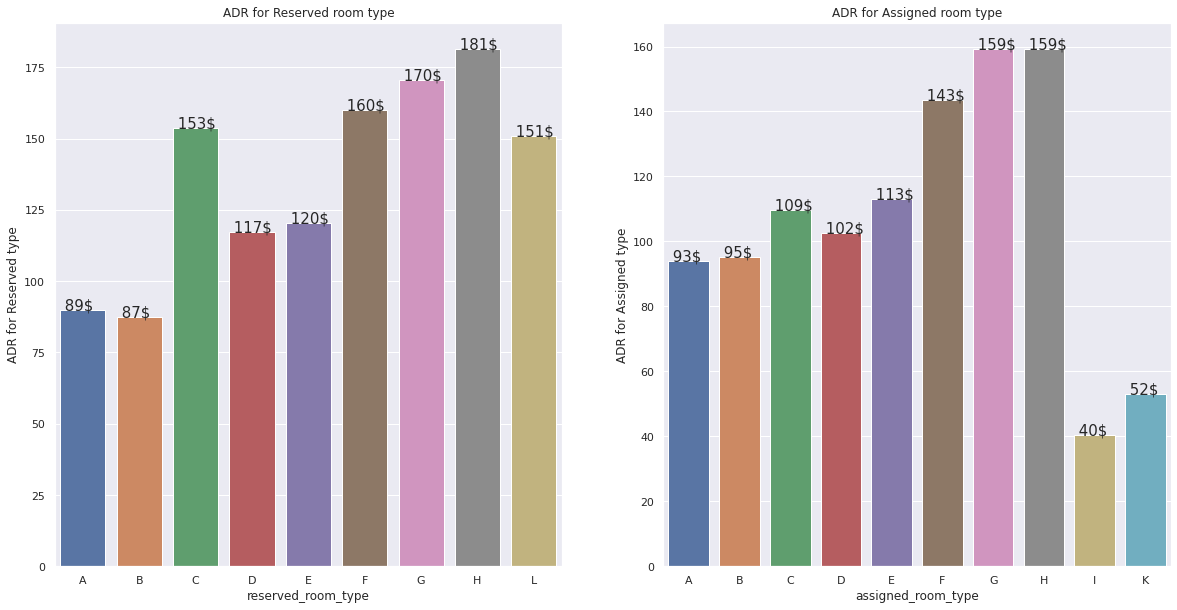

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize=(20,10)) 

plt.subplot(1, 2, 1)
ax = sns.barplot(x='reserved_room_type', y='ADR for Reserved type', data= adr_reserved_room)
plt.title('ADR for Reserved room type')
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}$", fontsize=15)

plt.subplot(1, 2, 2)
ax = sns.barplot(x='assigned_room_type', y='ADR for Assigned type', data= adr_assigned_room)
plt.title('ADR for Assigned room type');
for p in ax.patches:
   ax.text(p.get_x(),p.get_height(), f" {int(p.get_height())}$", fontsize=15)

**Conclusion:** 

ADR is highest for Reserved room type H ,followed by Reserved room type G & is low for Reserved room type  A & B. which might correspond to 0 bookings or maybe rooms for hotel employees

#16. Types of meal booked by the customers?
Type of meal booked. Categories are presented in standard hospitality meal packages.

Undefined/SC – no meal package

 BB – Bed & Breakfast
 
  HB – Half board (breakfast and one other meal – usually dinner)
  
  FB – Full board (breakfast, lunch and dinner)




In [ ]:
meal = not_canceled_df['meal'].value_counts()/len(not_canceled_df['meal'])*100
meal  = meal.rename_axis('Meal_type').reset_index(name='Percentage')
meal

,Meal_type,Percentage
0,BB,78.701571
1,HB,10.498308
2,SC,9.740600
3,Undefined,0.644926
4,FB,0.414595


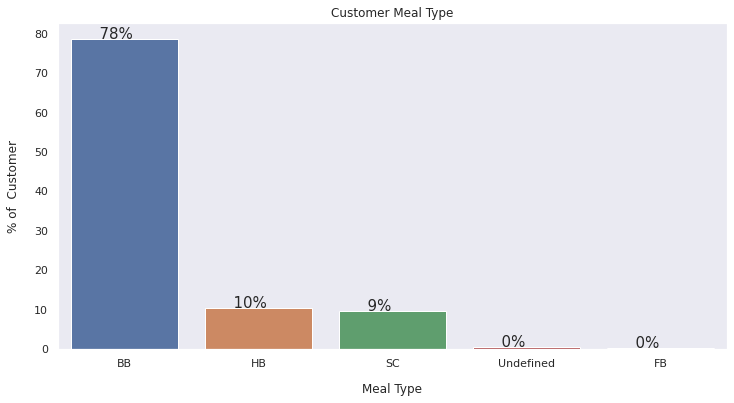

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='Meal_type', y='Percentage', data= meal)
plt.title('Customer Meal Type')
plt.xlabel("Meal Type", labelpad=14)
plt.ylabel("% of  bookings", labelpad=14);
for p in ax.patches:
  ax.text(p.get_x(),p.get_height(), f"      {int(p.get_height())}% ", fontsize=15)

**Conclusion:** Most bookings by Customers are Bed & Breakfast as much as 79%.

Half board (breakfast and one other meal – usually dinner) meals has booking as much as 10%.

Full board (breakfast, lunch and dinner) meal bookings are negligible.

Around 10% customers prefer no meal bookings.


Most customers prefer to book include Breakfast, which's the usual complimentary if someone wants to book a hotel. In case they don't have time to find breakfast outside the hotel. Some of them around 10% book with another meal, usually dinner. Them who came with business interests can get more resting time to not find any dinner outside hotel anymore.

#17. Deposit Type for Market Segment:
 Deposit type indicates if the customer made a deposit to guarantee the booking. 
 This variable can assume three categories: 
 
* No Deposit – no deposit was made
 
* Non Refund – a deposit was made in the value of the total stay cost
 
* Refundable – a deposit was made with a value under the total cost of stay.

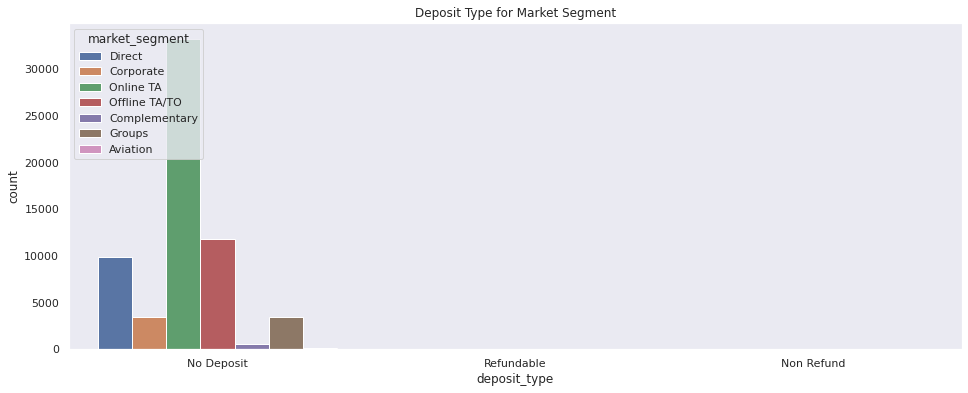

In [ ]:
sns.set_style("dark")
plt.figure(figsize=(16,6))
ax = sns.countplot(data=not_canceled_df ,x='deposit_type',hue='market_segment')
plt.title('Deposit Type for Market Segment');

**Conclusion :**

The highest book is using Online TA, with No Deposit. While Groups and Offline TA/TO are next with Refundable and Non refund. In this era, it will be easy to book a hotel using Online TA, especially most Online TA offers the customers without deposit facility. Customers can choose any type of room up to any special request by Online TA.
Looking at Offline TA/TO and Groups, the situations where the deposit was received were only in the scenarios where the groups came. It is quite logical to apply a deposit for a large number of customers who will fill important amount of the hotel capacity.

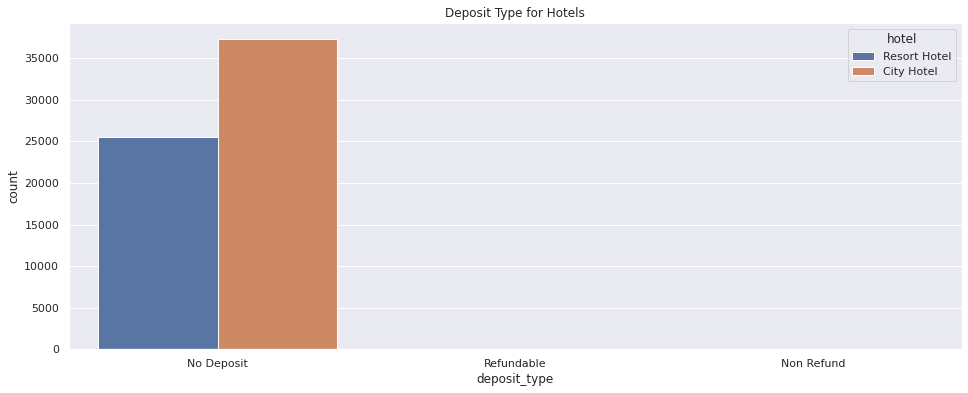

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(data=not_canceled_df ,x='deposit_type',hue='hotel')
plt.title('Deposit Type for Hotels');

**Conclusion:**  For most number of cases there are no deposits for both City Hotels & Resort Hotels.

#Final Analysis
We used the dataset that contains data about hotel bookings and learned that,

* Around 60% booking is done in City Hotels as compared to Resort Hotels. As Resort hotels tend to have less bookings in comparison to city hotels so they need to work on their marketing strategy and promote the hotels more, especially on social media. Resort hotels could also reduce prices to increases booking percentages.

* More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.
* Most bookings were made from July to August. And the least bookings were made at the start and end of the year.

* Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

* Most people stay for one, two, or three.

 For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.

 For City hotel, most popular stay duration is one, two, seven(week), and three respectively

* Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly

#What stands out from the data?

* There is a max lead time of 737 days! Do hotels even allow that? Is that a good data point?

* Someone stayed 19 weekend nights. Did this person/family stay for 10-11 weeks? 

* Looking at stays_in_week_nights, this seems plausible as a 50 weekday stretch would be 10 weeks.

* 55 adults in a single room? 10 children? 10 babies?

* $5,400 for an average daily rate?

* 8 Parking spots? I guess that can work with 55 adults.

#Happy exploring!!

Feel free if you have any question or suggestion! Thank you!!